Ce projet rentre dans le cadre du stage de pratique de l'ingénierie et de la recherche consiste à l'application des algorithmes de regroupement basés sur la densité (Density based clustering algorithms) pour l'affinage d'un modèle géologique en se basant sur des données géophysiques de terrain

In [1]:
"Méthodes".upper()

'MÉTHODES'

# Bibliothèques utilisées

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Données géophysiques

In [24]:
file_cp1 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\3D_P1_Guidel_MGL_v2.dat"
file_cp2 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\3D_P2_Guidel_MGL_v2.dat"

file_cp_elec_1 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\P1.txt"
file_cp_elec_2 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\P2.txt"
file_cp_elec_3 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\P3.txt"
cp_elec_1 = pd.read_csv(file_cp_elec_1, sep=" ")
cp_elec_2 = pd.read_csv(file_cp_elec_2, sep=" ")
cp_elec_3 = pd.read_csv(file_cp_elec_3, sep=" ")

coupe_1 = pd.read_csv(file_cp1, sep=" ")
coupe_2 = pd.read_csv(file_cp2, sep=" ")


In [25]:
ft = ["X", "Y", "Z", "resistivity"]
cp_elec_1 = cp_elec_1[ft]
cp_elec_2 = cp_elec_2[ft]
cp_elec_3 = cp_elec_3[ft]

coupes = pd.concat([cp_elec_1, cp_elec_2, cp_elec_3], ignore_index=1)

In [26]:
slice1 = coupes.iloc[0:len(cp_elec_1)]
slice2 = coupes.iloc[len(cp_elec_1):len(cp_elec_1)+len(cp_elec_2)]
slice3 = coupes.iloc[len(cp_elec_1)+len(cp_elec_2):]

slice2 = slice2.reset_index(drop=1)
slice3 = slice3.reset_index(drop=1)

In [63]:
slice1

,X,Y,Z,resistivity,resistivity_log,label
0,164374.421875,2322100.25,10.140000,105.230003,4.656148,3
1,164372.546875,2322100.75,10.120000,105.540001,4.659090,3
2,164370.656250,2322101.25,10.110000,106.639999,4.669459,3
3,164368.718750,2322101.75,10.110000,108.059998,4.682687,3
4,164366.828125,2322102.25,10.150000,122.769997,4.810313,3
...,...,...,...,...,...,...
4445,163933.187500,2322231.25,-28.690001,666.469971,6.501995,0
4446,163931.203125,2322231.50,-28.610001,669.059998,6.505874,0
4447,163929.218750,2322231.75,-28.530001,674.539978,6.514031,0
4448,163927.234375,2322231.75,-28.440001,625.869995,6.439143,0


In [4]:
ft = ["X", "Y", "Z", "mgl", "vp"]
coupe_1M = coupe_1[ft]
coupe_2M = coupe_2[ft]
coupes = pd.concat([coupe_1M, coupe_2M], ignore_index=1)

In [5]:
slice1 = coupes.iloc[0:len(coupe_1)]
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)

# Données puits/forages

In [28]:
file_well_PZ26 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\PZ26_devie.txt"
file_well_PSR5 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\PSR5_well.txt"
file_well_PSR6 = r"C:\Users\SOUASSI\Documents\ENGEES\S8\SPI\Stage\DataClustering\PSR6_well.txt"
PZ26_well = pd.read_csv(file_well_PZ26, sep='\t')
PZ26_well = pd.read_csv(file_well_PZ26, sep='\t')
PSR5_well = pd.read_csv(file_well_PSR5, sep='\t')
PSR6_well = pd.read_csv(file_well_PSR6, sep='\t')

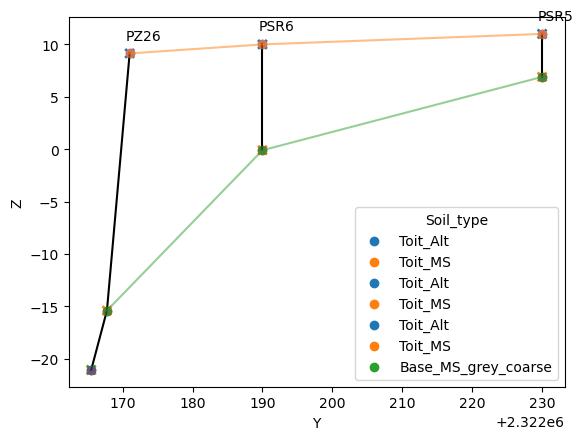

In [29]:
points = PZ26_well[['X', 'Y', 'Z', 'Depth', 'Soil_type']]
PZ26 = points.iloc[:3]
wells = pd.concat([PSR5_well, PSR6_well, PZ26], ignore_index=1)

sns.scatterplot(data=PSR5_well, x='Y', y='Z',marker='x',s=2,linewidth = 9, hue='Soil_type')
plt.plot(PSR5_well['Y'], PSR5_well['Z'], '-',color='black')
sns.scatterplot(data=PSR6_well, x='Y', y='Z',marker='x',s=2,linewidth = 9, hue='Soil_type')
plt.plot(PSR6_well['Y'], PSR6_well['Z'], '-',color='black')
sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9, hue='Soil_type')
plt.plot(PZ26['Y'], PZ26['Z'], '-',color='black')

plt.annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='center')
plt.annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='center')
plt.annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='center')

grouped_data = wells.groupby('Soil_type')

# Plot the scatter plot with lines connecting points with the same attribute
for name, group in grouped_data:
    plt.scatter(group['Y'], group['Z'], label=name)  # Plot the points
    plt.plot(group['Y'], group['Z'], marker='o', linestyle='-', alpha=0.5)


# plt.plot(wells['Y'], wells['Z'], '-')
plt.show()

___

### Logarithm()

In [9]:
coupes['mgl_norm'] = np.log(coupes['mgl'])
coupes['vp_norm'] = np.log(coupes['vp'])

In [31]:
coupes['resistivity_log'] = np.log(coupes['resistivity'])
coupes

,X,Y,Z,resistivity,resistivity_log
0,164374.421875,2322100.25,10.140000,105.230003,4.656148
1,164372.546875,2322100.75,10.120000,105.540001,4.659090
2,164370.656250,2322101.25,10.110000,106.639999,4.669459
3,164368.718750,2322101.75,10.110000,108.059998,4.682687
4,164366.828125,2322102.25,10.150000,122.769997,4.810313
...,...,...,...,...,...
9893,163997.265625,2322283.25,-43.430000,571.109985,6.347582
9894,163994.828125,2322282.75,-43.349998,566.809998,6.340024
9895,163992.390625,2322282.25,-43.340000,579.390015,6.361976
9896,163989.937500,2322281.75,-43.250000,636.979980,6.456738


___

## Visualisation du paramètre éléctrique MGL

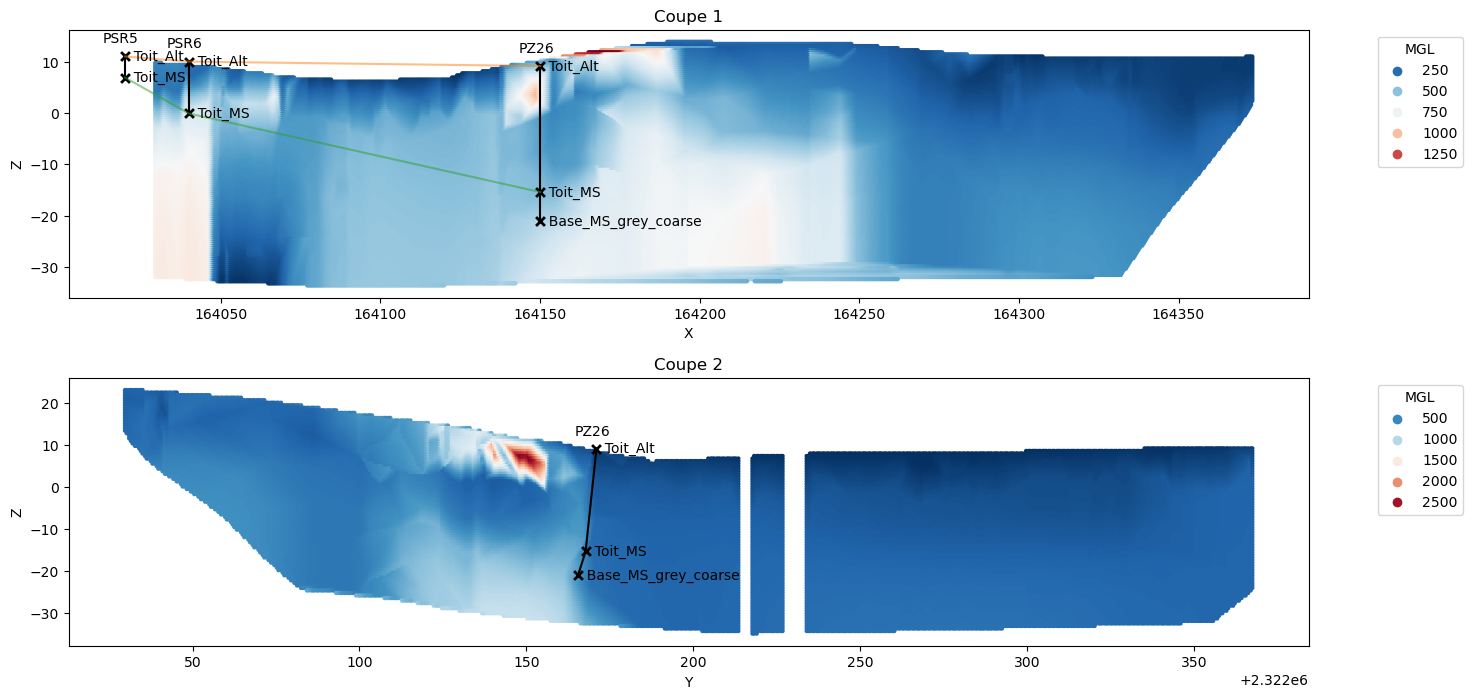

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
#crest, RdYlBu, coolwarm, !!RdBu_r!!

#coupe 1
sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['mgl'], s=10,ax=axes[0],palette='RdBu_r',linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

grouped_data = wells.groupby('Soil_type')

# Plot the scatter plot with lines connecting points with the same attribute
for name, group in grouped_data:
    # axes[0].scatter(group['X'], group['Z'], label=name)  # Plot the points
    axes[0].plot(group['X'], group['Z'], marker='', linestyle='-', alpha=0.5)

#coupe 2
sns.scatterplot(data=slice2, x='Y' , y='Z',hue=slice2['mgl'], s=10,ax=axes[1],palette='RdBu_r',linewidth = 0)
axes[1].set_title("Coupe 2")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
for index, row in PZ26.iterrows():
    axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

# Move the legend outside the plots
legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='MGL')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='MGL')


    
plt.subplots_adjust(hspace=0.3)
plt.show()

In [28]:
"Application des algorithmes de regroupement".upper()

'APPLICATION DES ALGORITHMES DE REGROUPEMENT'

## Visualisation du paramètre mécanique Vp

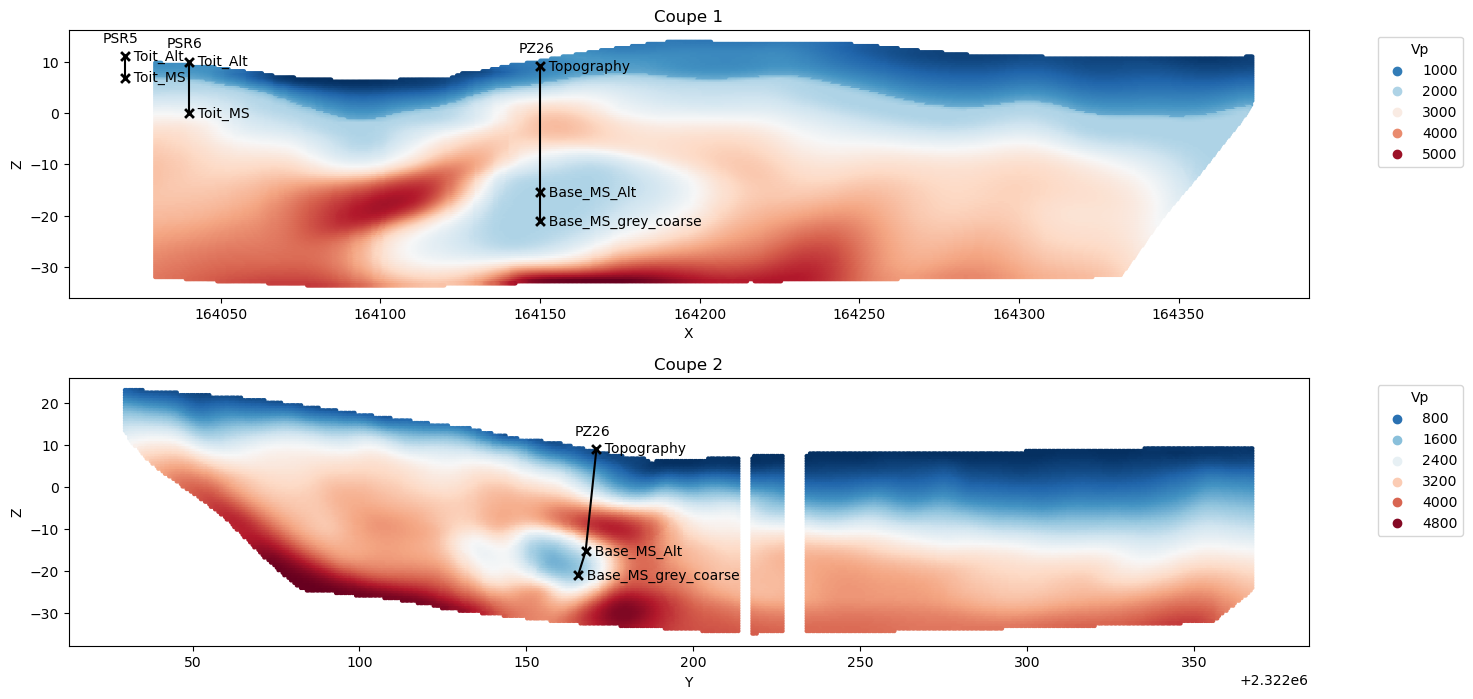

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
#crest, RdYlBu, coolwarm, !!RdBu_r!!

#coupe 1
sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['vp'], s=10,ax=axes[0],palette='RdBu_r',linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

#coupe 2
sns.scatterplot(data=slice2, x='Y' , y='Z',hue=slice2['vp'], s=10,ax=axes[1],palette='RdBu_r',linewidth = 0)
axes[1].set_title("Coupe 2")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
for index, row in PZ26.iterrows():
    axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

# Move the legend outside the plots
legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Vp')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Vp')

plt.subplots_adjust(hspace=0.3)
plt.show()

___

## Paramètres regressés

In [12]:
# Calculer la profondeur relative à la surface pour chaque point
coupe_1['P'] = coupe_1.groupby(['X', 'Y'])['Z'].transform(lambda x: x.max() - x)
coupe_2['P'] = coupe_2.groupby(['X', 'Y'])['Z'].transform(lambda x: x.max() - x)
coupes['P'] = coupes.groupby(['X', 'Y'])['Z'].transform(lambda x: x.max() - x)

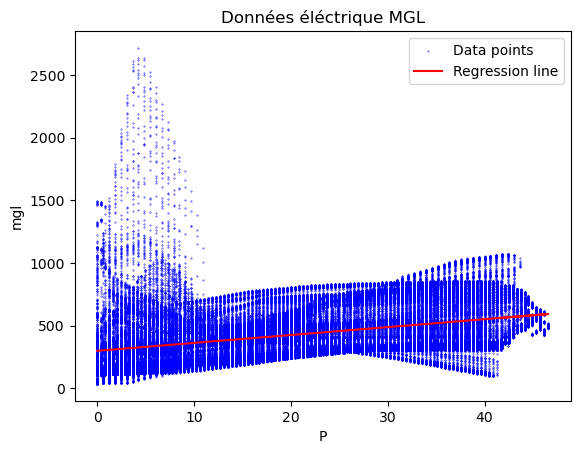

Equation of the regression line: mgl = 6.29 * P + 300.58


In [30]:
# Extract the columns "mgl" and "Z" from the DataFrame
mgl = coupes['mgl']
Z = coupes['P']

# Convert the columns to numpy arrays and reshape them to the required format
mgl = np.array(mgl).reshape(-1, 1)
Z = np.array(Z).reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()
model.fit(Z, mgl)

# Generate predicted values using the regression model
mgl_pred = model.predict(Z)

# Create a scatter plot with the regression line
plt.scatter(Z, mgl, color='blue', s=0.1, label='Data points')
plt.plot(Z, mgl_pred, color='red', label='Regression line')
plt.xlabel('P')
plt.ylabel('mgl')
plt.title('Données éléctrique MGL')
plt.legend()
plt.show()

# Extract the slope (coefficient) and intercept of the regression line
slope = model.coef_[0][0]
intercept = model.intercept_[0]
coupes['mgl_r'] = coupes['mgl'] - (slope * coupes['P'] + intercept)
# Print the equation of the regression line
equation = f"""mgl = {slope:.2f} * P + {intercept:.2f}"""
print("Equation de régression :", equation)

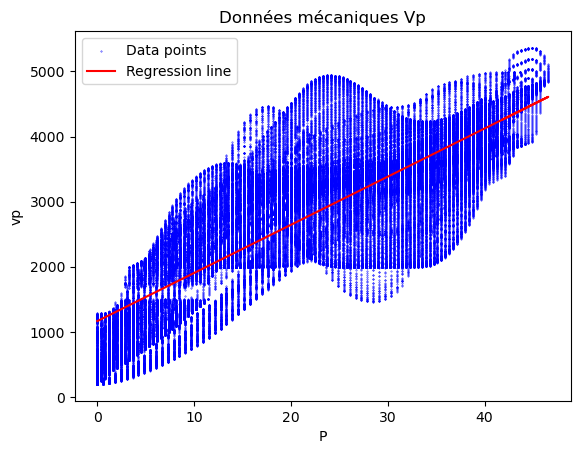

Equation of the regression line: vp = 73.98 * P + 1165.14


In [29]:
# mgl variable stands for vp !!!!!!!!!!!!!! 
# Extract the columns "mgl" and "Z" from the DataFrame
vp = coupes['vp']
Z = coupes['P']

# Convert the columns to numpy arrays and reshape them to the required format
vp = np.array(vp).reshape(-1, 1)
Z = np.array(Z).reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()
model.fit(Z, vp)

# Generate predicted values using the regression model
vp_pred = model.predict(Z)

# Create a scatter plot with the regression line
plt.scatter(Z, vp, color='blue', s=0.1, label='Data points')
plt.plot(Z, vp_pred, color='red', label='Regression line')
plt.xlabel('P')
plt.ylabel('vp')
plt.title('Données mécaniques Vp')
plt.legend()
plt.show()

# Extract the slope (coefficient) and intercept of the regression line
slope = model.coef_[0][0]
intercept = model.intercept_[0]

coupes['vp_r'] = coupes['vp'] - (slope * coupes['P'] + intercept)

# Print the equation of the regression line
equation = f"vp = {slope:.2f} * P + {intercept:.2f}"
print("Equation de régression :", equation)

In [26]:
# Logarithm of mgl_r and vp_r
coupes['mgl_r_norm'] = pd.DataFrame({'mgl_r': np.log(coupes['mgl_r']+2*np.abs(min(coupes['mgl_r'])))})
coupes['vp_r_norm'] = pd.DataFrame({'vp_r': np.log(coupes['vp_r']+2*np.abs(min(coupes['vp_r'])))})


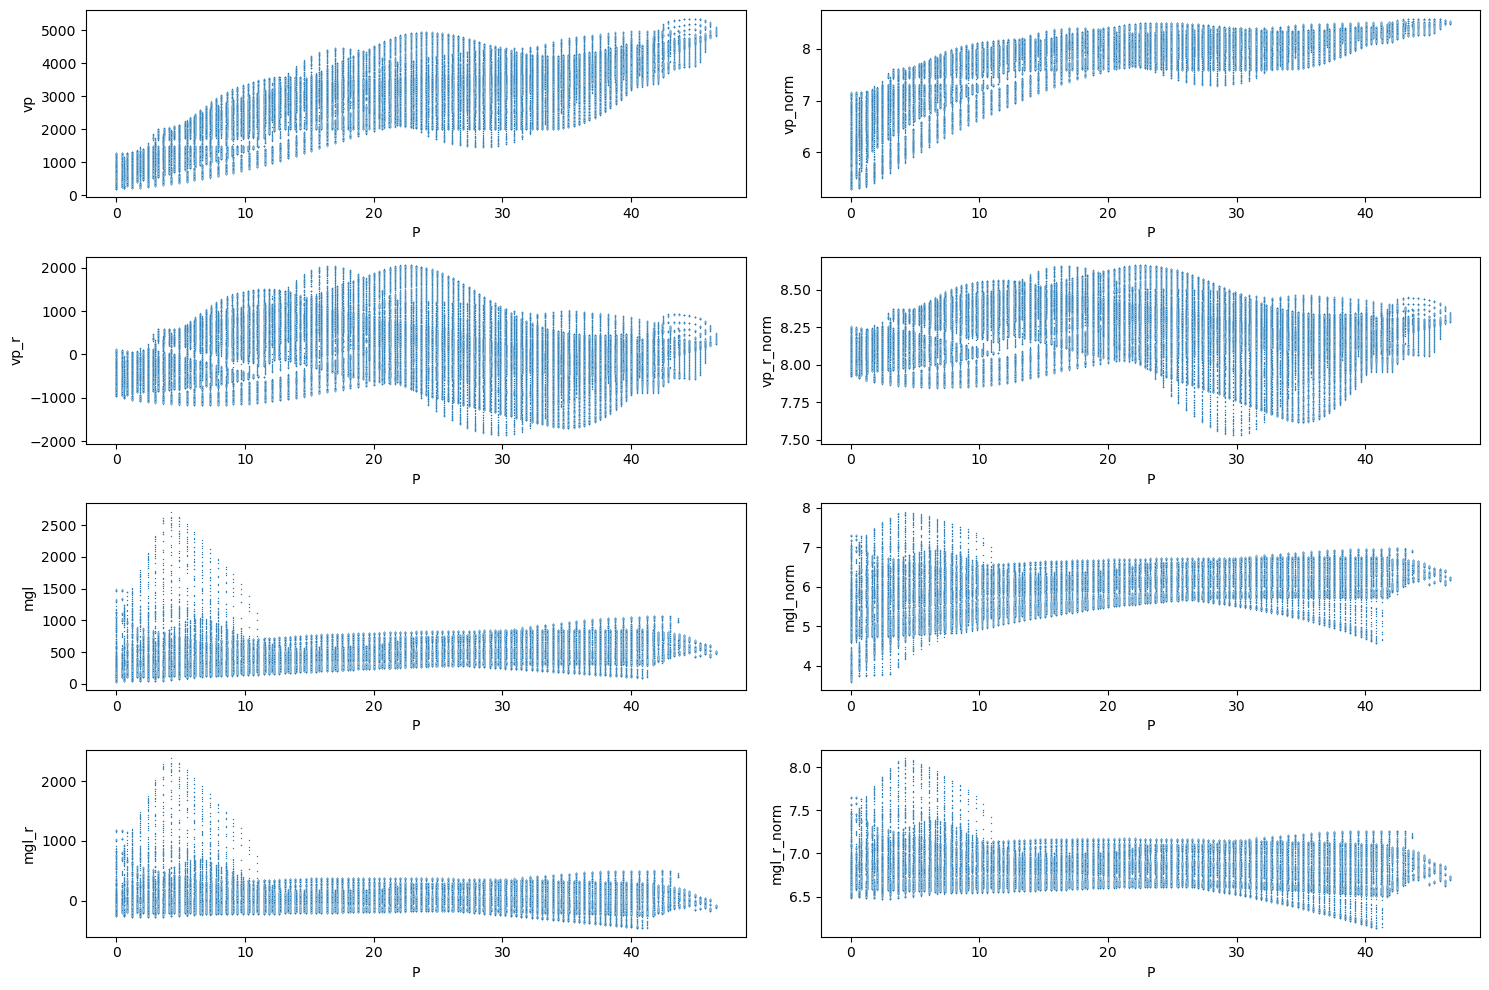

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

sns.scatterplot(data=coupes,x='P',y='vp',s=1,ax=axes[0, 0])
sns.scatterplot(data=coupes,x='P',y='vp_norm',s=1,ax=axes[0, 1])
sns.scatterplot(data=coupes,x='P',y='vp_r',s=1,ax=axes[1, 0])
sns.scatterplot(data=coupes,x='P',y='vp_r_norm',s=1,ax=axes[1, 1])
sns.scatterplot(data=coupes,x='P',y='mgl',s=1,ax=axes[2, 0])
sns.scatterplot(data=coupes,x='P',y='mgl_norm',s=1,ax=axes[2, 1])
sns.scatterplot(data=coupes,x='P',y='mgl_r',s=1,ax=axes[3, 0])
sns.scatterplot(data=coupes,x='P',y='mgl_r_norm',s=1,ax=axes[3, 1])
plt.tight_layout()

In [17]:
coupes

,X,Y,Z,mgl,vp,mgl_norm,vp_norm,P,mgl_r,vp_r,mgl_r_norm,vp_r_norm
0,164189.875000,2322155.00,13.832981,252.414520,984.434570,5.531073,6.892067,0.000000,-48.164223,-180.703669,6.025384,5.639284
1,164190.265625,2322155.00,13.832981,252.187393,984.488831,5.530172,6.892123,0.000000,-48.391350,-180.649408,6.024835,5.639477
2,164190.656250,2322154.75,13.832981,251.960281,984.933594,5.529271,6.892574,0.000000,-48.618462,-180.204645,6.024286,5.641056
3,164191.046875,2322154.75,13.832981,251.733154,983.090027,5.528370,6.890701,0.000000,-48.845589,-182.048212,6.023736,5.634492
4,164191.453125,2322154.75,13.832981,251.506027,981.326721,5.527467,6.888905,0.000000,-49.072716,-183.811518,6.023186,5.628173
...,...,...,...,...,...,...,...,...,...,...,...,...
126958,164154.984375,2322205.25,-34.409428,319.750793,4121.173340,5.767542,8.323893,41.213208,-240.193372,-92.791934,5.401648,5.911265
126959,164154.953125,2322204.00,-34.409428,319.205536,4124.683594,5.765835,8.324745,40.607131,-236.924429,-44.445958,5.416280,6.034330
126960,164156.046875,2322219.00,-35.015503,336.925171,4047.590332,5.819861,8.305877,42.425359,-230.647375,-256.046165,5.443791,5.327482
126961,164155.953125,2322218.25,-35.015503,336.671021,4051.986572,5.819106,8.306963,42.425359,-230.901525,-251.649925,5.442692,5.348606


# Clustering


### DBSCAN 1D

In [47]:
from sklearn.cluster import DBSCAN
algo = 'DBSCAN'
eps = 0.05
min_sample = 280
dataset_DB = ['mgl', 'vp']
dbscan = DBSCAN(eps=eps,min_samples=min_sample)
dbscan_predict = coupes[dataset_DB]
dbscan.fit(dbscan_predict)
labels = dbscan.labels_
coupes['label'] = labels
noise = np.count_nonzero(labels == -1)
# coupes['label'] = labels
print("Total Clusters :", len(np.unique(labels)))
print('percentage of noise :',"{:.2f}".format(noise/len(labels)*100), "%")
slice1 = coupes.iloc[0:len(coupe_1)]
# print(slice1.equals(coupe_1M))
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)
print("label coupe 1 :",np.unique(slice1['label']))
print("label coupe 2 :",np.unique(slice2['label']))
print("Nombre total des clusters :",len(np.unique(labels)))

Total Clusters : 1
percentage of noise : 100.00 %
label coupe 1 : [-1]
label coupe 2 : [-1]
Nombre total des clusters : 1


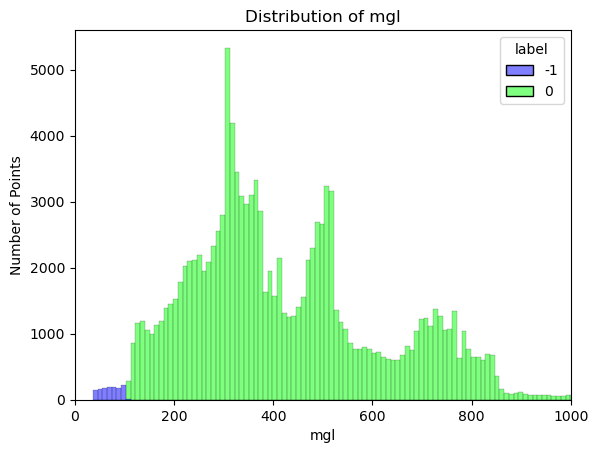

In [10]:

sns.histplot(data=coupes, x='mgl', bins='auto',palette='brg', kde=0,hue=coupes['label'])

# Set the labels and title
plt.xlabel('mgl')
plt.ylabel('Number of Points')
plt.title('Distribution of mgl')
plt.xlim(0,1000)

# Show the plot
plt.show()

In [12]:
min(coupes['mgl_r'].values.reshape(-1, 1))

KeyError: 'mgl_r'

### DBSCAN 2D

label coupe 1 : [-1  0]
label coupe 2 : [-1  0]


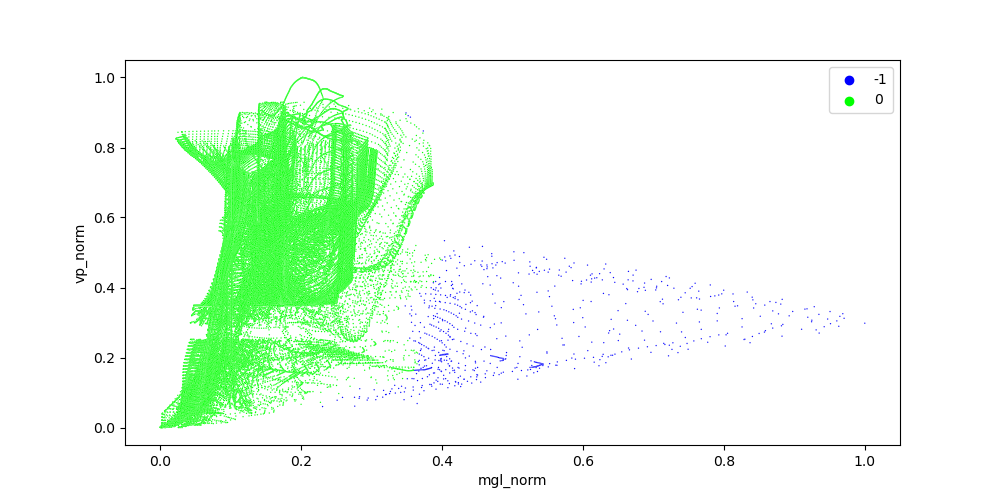

In [45]:

#USING DBSCAN ALGO$

from dbscan import DBSCAN

eps=0.05
min_sample=280
dataset_DB = ['mgl_norm', 'vp_norm']
labels, core_samples_mask = DBSCAN(coupes[dataset_DB], eps=eps, min_samples=min_sample)
algo = 'DBSCAN'
###
# noise = np.count_nonzero(labels == -1)
coupes['label'] = labels
'''
# print("Total Clusters :", len(np.unique(labels)))
# print('percentage of noise :',"{:.2f}".format(noise/len(labels)*100), "%")
# slice1 = coupes.iloc[0:90806]
# # print(slice1.equals(coupe_1M))
# slice2 = coupes.iloc[90806:]
# slice2 = slice2.reset_index(drop=1)
# print("label coupe 1 :",np.unique(slice1['label']))
# print("label coupe 2 :",np.unique(slice2['label']))
'''
slice1 = coupes.iloc[0:len(coupe_1)]
# print(slice1.equals(coupe_1M))
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)
print("label coupe 1 :",np.unique(slice1['label']))
print("label coupe 2 :",np.unique(slice2['label']))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.scatterplot(data=coupes, x= 'mgl_norm', y='vp_norm', s=1,hue=labels,palette='brg')
ax.set_xlabel('mgl_norm')
# ax.set_ylim(0,8)
# ax.set_xlim(4,8)
ax.set_ylabel('vp_norm')
plt.show()

# fig = plt.figure(figsize=(15,8))
# ax = fig.add_subplot(111)
# ax.scatter(coupes['mgl_r'], coupes['vp_r'], c=labels,cmap='brg', s=1)
# ax.set_xlabel('mgl')
# ax.set_xlim(3,) 
# ax.set_ylabel('vp')
# ax.legend(labels)
# plt.show()

# print(slice2.equals(coupe_2M))
# slice2




In [37]:
ind = pd.DataFrame({'index': coupes.index})
ind

,index
0,0
1,1
2,2
3,3
4,4
...,...
126958,126958
126959,126959
126960,126960
126961,126961


In [38]:
ind['mgl'] = coupes['mgl']
ind

,index,mgl
0,0,252.414520
1,1,252.187393
2,2,251.960281
3,3,251.733154
4,4,251.506027
...,...,...
126958,126958,319.750793
126959,126959,319.205536
126960,126960,336.925171
126961,126961,336.671021


interactive(children=(FloatSlider(value=1.0, description='Epsilon', max=1.0, min=0.01, step=0.01), IntSlider(v…

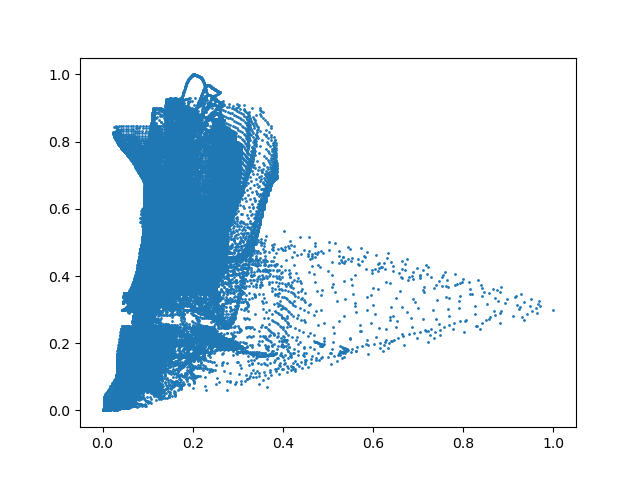

In [26]:
# %matplotlib widget
# from sklearn.cluster import DBSCAN
from dbscan import DBSCAN
from ipywidgets import interact, FloatSlider, IntSlider


# Create the initial scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(coupes['mgl_norm'], coupes['vp_norm'],s=1)

# Define the DBSCAN model
dataset_DB = ['mgl_norm', 'vp_norm']
dbscan = DBSCAN(coupes[dataset_DB], eps=0.1, min_samples=100)

# Function to update the clustering based on the slider values
def update_clustering(epsilon, min_samples):
    dbscan.eps = epsilon
    dbscan.min_samples = min_samples
    clusters, core_samples_mask = DBSCAN(coupes[dataset_DB], eps=eps, min_samples=min_sample)

    # Map cluster labels to colors
    colors = ['red', 'blue', 'green', 'purple']  # Add more colors as needed
    mapped_colors = [colors[label % len(colors)] for label in clusters]

    scatter.set_color(mapped_colors)
    plt.draw()

# Create interactive sliders for adjusting epsilon and min_samples
epsilon_slider = FloatSlider(min=0.01, max=1, step=0.01, value=1, description='Epsilon')
min_samples_slider = IntSlider(min=100, max=1000, value=5, description='Min Samples')

# Register the update_clustering function as an event handler
interact(update_clustering, epsilon=epsilon_slider, min_samples=min_samples_slider)

# Show the plot
plt.show()


In [29]:
# type(dbscan.fit_predict(coupes[['mgl', 'vp']]))
# from dbscan import DBSCAN
# labels, core_samples_mask = DBSCAN(coupes[dataset_DB], eps=eps, min_samples=min_sample)
# labels
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=100)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'algorithm',
 'eps',
 'fit',
 'fit_predict',
 'get_params',
 'leaf_size',
 'metric',
 'metric_params',
 'min_samples',
 'n_jobs',
 'p',
 'set_params']

TypeError: DBSCAN() missing required argument 'X' (pos 1)

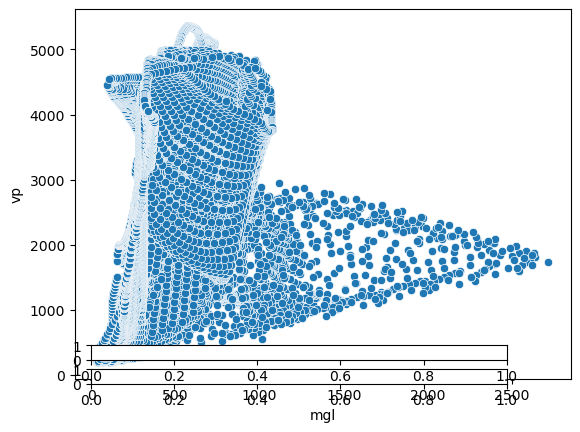

In [ ]:

# Extract the 'mgl' and 'vp' columns
x = coupes['mgl']
y = coupes['vp']

# Create a scatter plot using seaborn
sns.scatterplot(x=x, y=y)

# Create interactive scale bars for adjusting epsilon and min_samples
epsilon = plt.axes([0.05, 0.1, 0.65, 0.03])
min_samples = plt.axes([0.15, 0.15, 0.65, 0.03])

# Define the DBSCAN model
dbscan = DBSCAN(coupes[dataset_DB],eps=1, min_samples=5)

# Function to update the clustering based on the scale bar values
def update_clustering(val):
    eps_value = epsilon.val
    min_samples_value = min_samples.val
    dbscan.set_params(eps=eps_value, min_samples=min_samples_value)
    clusters = dbscan.fit_predict(coupes[['mgl', 'vp']])
    sns.scatterplot(x=x, y=y, hue=clusters, palette='viridis')

# Register the update_clustering function as an event handler
epsilon.on_changed(update_clustering)
min_samples.on_changed(update_clustering)

# Set initial clustering with default scale bar values
clusters = dbscan.fit_predict(coupes[['mgl', 'vp']])
sns.scatterplot(x=x, y=y, hue=clusters, palette='viridis')

# Show the plot
plt.show()


### HDBSCAN

In [34]:
# trois coupes
import hdbscan
# Extract the 'mgl' and 'vp' columns as input for HDBSCAN
algo = 'HDBSCAN'
dataset_HDB = ['resistivity']
data = coupes[dataset_HDB].values
min_samples = 500
min_cluster_size = 500
epsilon_HDB = 0
# Create an instance of HDBSCAN and fit the data
hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples,min_cluster_size=min_cluster_size,cluster_selection_epsilon=epsilon_HDB)
#,cluster_selection_epsilon=0.5
hdbscan_labels = hdbscan_model.fit_predict(data)
labels = hdbscan_labels
# Assign the cluster labels to the 'label' column of the DataFrame
coupes['label'] = labels
noise = np.count_nonzero(labels == -1)
# coupes['label'] = labels
print("Total Clusters :", len(np.unique(labels)))
print('percentage of noise :',"{:.2f}".format(noise/len(labels)*100), "%")

# slice1 = coupes.iloc[0:len(coupe_1)]
# # print(slice1.equals(coupe_1M))
# slice2 = coupes.iloc[len(coupe_1):]
# slice2 = slice2.reset_index(drop=1)
slice1 = coupes.iloc[0:len(cp_elec_1)]
slice2 = coupes.iloc[len(cp_elec_1):len(cp_elec_1)+len(cp_elec_2)]
slice3 = coupes.iloc[len(cp_elec_1)+len(cp_elec_2):]

slice2 = slice2.reset_index(drop=1)
slice3 = slice3.reset_index(drop=1)

print("label coupe 1 :",np.unique(slice1['label']))
print("label coupe 2 :",np.unique(slice2['label']))
print("label coupe 3 :",np.unique(slice3['label']))

Total Clusters : 5
percentage of noise : 30.36 %
label coupe 1 : [-1  0  1  2  3]
label coupe 2 : [-1  0  1  2  3]
label coupe 3 : [-1  0  1  2  3]


In [ ]:
import hdbscan
# Extract the 'mgl' and 'vp' columns as input for HDBSCAN
algo = 'HDBSCAN'
dataset_HDB = ['mgl_r_norm', 'vp_r_norm']
data = coupes[dataset_HDB].values
min_samples = 100
min_cluster_size = 300
epsilon_HDB = 0
# Create an instance of HDBSCAN and fit the data
hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples,min_cluster_size=min_cluster_size,cluster_selection_epsilon=epsilon_HDB)
#,cluster_selection_epsilon=0.5
hdbscan_labels = hdbscan_model.fit_predict(data)
labels = hdbscan_labels
# Assign the cluster labels to the 'label' column of the DataFrame
coupes['label'] = labels
noise = np.count_nonzero(labels == -1)
# coupes['label'] = labels
print("Total Clusters :", len(np.unique(labels)))
print('percentage of noise :',"{:.2f}".format(noise/len(labels)*100), "%")

slice1 = coupes.iloc[0:len(coupe_1)]
# print(slice1.equals(coupe_1M))
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)
print("label coupe 1 :",np.unique(slice1['label']))
print("label coupe 2 :",np.unique(slice2['label']))

Total Clusters : 22
percentage of noise : 40.82 %
label coupe 1 : [-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
label coupe 2 : [-1  0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [ ]:
import hdbscan
# Extract the 'mgl' and 'vp' columns as input for HDBSCAN
algo = 'HDBSCAN'
dataset_HDB = ['mgl_r_norm', 'vp_r_norm']
data = coupes[dataset_HDB].values
min_samples = 100
min_cluster_size = 300
epsilon_HDB = 0
# Create an instance of HDBSCAN and fit the data
hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples,min_cluster_size=min_cluster_size,cluster_selection_epsilon=epsilon_HDB)
#,cluster_selection_epsilon=0.5
hdbscan_labels = hdbscan_model.fit_predict(data)
labels = hdbscan_labels
# Assign the cluster labels to the 'label' column of the DataFrame
coupes['label'] = labels
noise = np.count_nonzero(labels == -1)
# coupes['label'] = labels
print("Total Clusters :", len(np.unique(labels)))
print('percentage of noise :',"{:.2f}".format(noise/len(labels)*100), "%")

slice1 = coupes.iloc[0:len(coupe_1)]
# print(slice1.equals(coupe_1M))
slice2 = coupes.iloc[len(coupe_1):]
slice2 = slice2.reset_index(drop=1)
print("label coupe 1 :",np.unique(slice1['label']))
print("label coupe 2 :",np.unique(slice2['label']))

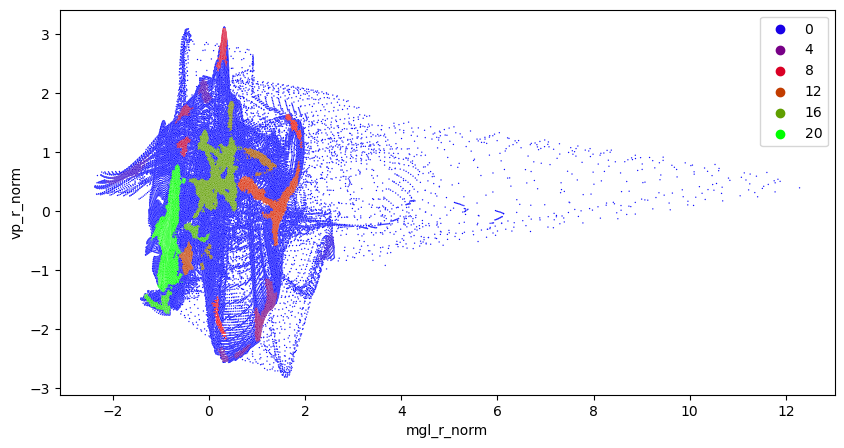

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.scatterplot(data=coupes, x= 'mgl_r_norm', y='vp_r_norm', s=1,hue=labels,palette='brg')
ax.set_xlabel('mgl_r_norm')
# ax.set_ylim(0,8)
# ax.set_xlim(4,8)
ax.set_ylabel('vp_r_norm')
plt.show()

# Affichage des clusters en 2D

C:\Users\SOUASSI\AppData\Local\Temp\ipykernel_14072\1255468541.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


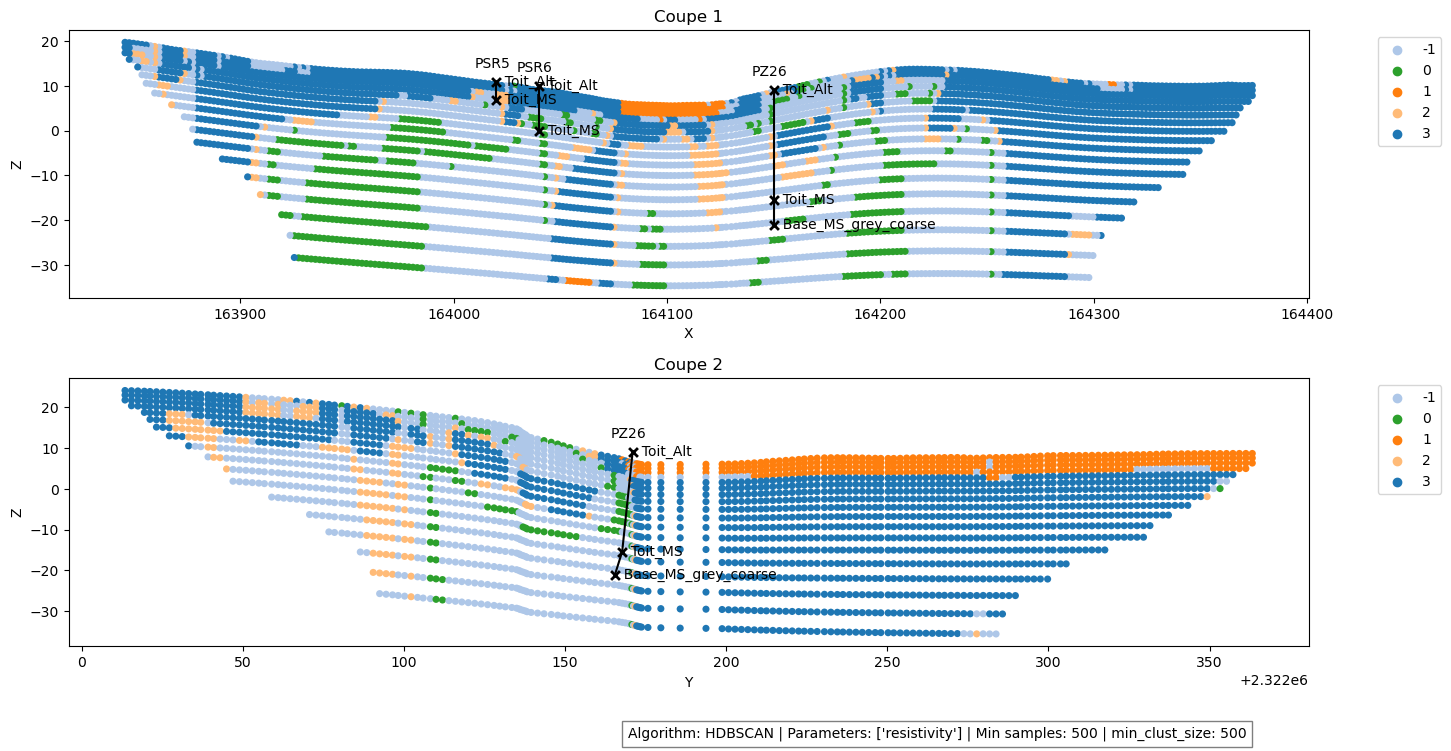

In [70]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

unique_labels = coupes['label'].unique()
# Create a color map dictionary
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Use the color map to assign colors based on label
colors = coupes['label'].map(color_map)


# test = slice2[slice2['label'].isin([0, -1])]
#coupe 1
sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['label'], s=26,ax=axes[0],palette=color_map,linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
axes[0].legend(title='Légende')
sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')



#coupe 2
sns.scatterplot(data=slice2, x='Y' , y='Z',hue=slice2['label'], s=26,ax=axes[1],palette=color_map,linewidth = 0)
axes[1].set_title("Coupe 2")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
axes[1].legend(title='Légende')
sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
for index, row in PZ26.iterrows():
    axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

# points = well[['Soil type','X', 'Z']]
# sns.scatterplot(data=z, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1], hue='Soil type')


if algo == 'DBSCAN':
    clustering_params = f"Algorithm: {algo} | Parameters: {str(dataset_DB)} | Epsilon: {eps} | Min samples: {min_sample}"
elif algo == 'HDBSCAN':
    if hdbscan_model.cluster_selection_epsilon == 0:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}"
    else:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}\nCluster_selection_epsilon: {hdbscan_model.cluster_selection_epsilon}"
fig.text(0.95, -0.3, clustering_params, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))



# Move the legend outside the plots
legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

C:\Users\SOUASSI\AppData\Local\Temp\ipykernel_14072\3172959380.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


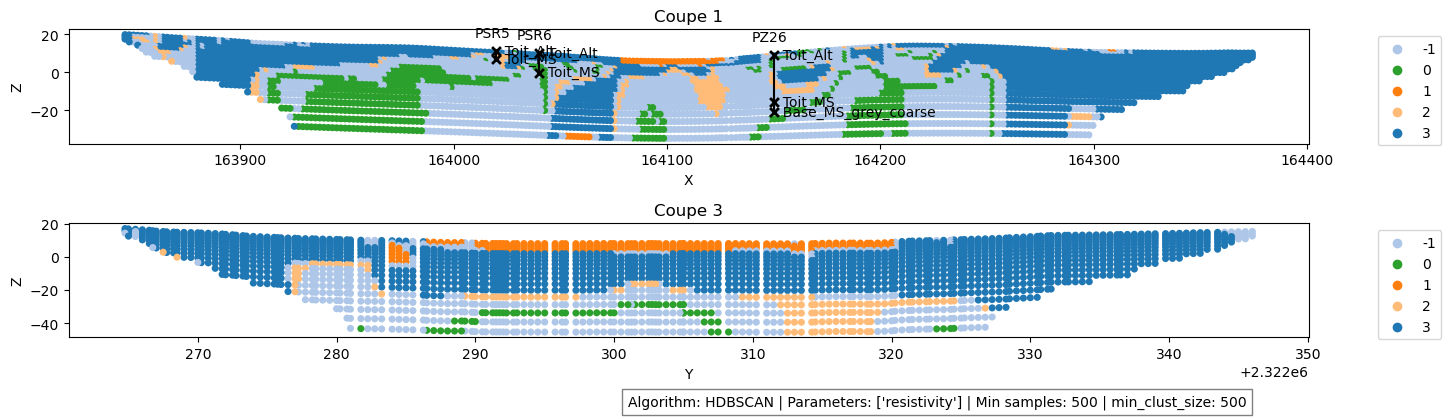

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(16, 4))

unique_labels = coupes['label'].unique()
# Create a color map dictionary
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Use the color map to assign colors based on label
colors = coupes['label'].map(color_map)


# test = slice2[slice2['label'].isin([0, -1])]
#coupe 1
sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['label'], s=26,ax=axes[0],palette=color_map,linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
axes[0].legend(title='Légende')
sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')



#coupe 2
sns.scatterplot(data=slice3, x='Y' , y='Z',hue=slice3['label'], s=26,ax=axes[1],palette=color_map,linewidth = 0)
axes[1].set_title("Coupe 3")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
axes[1].legend(title='Légende')
# sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
# axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
# for index, row in PZ26.iterrows():
    # axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
# axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

# points = well[['Soil type','X', 'Z']]
# sns.scatterplot(data=z, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1], hue='Soil type')


if algo == 'DBSCAN':
    clustering_params = f"Algorithm: {algo} | Parameters: {str(dataset_DB)} | Epsilon: {eps} | Min samples: {min_sample}"
elif algo == 'HDBSCAN':
    if hdbscan_model.cluster_selection_epsilon == 0:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}"
    else:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}\nCluster_selection_epsilon: {hdbscan_model.cluster_selection_epsilon}"
fig.text(0.95, -0.5, clustering_params, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
# fig.tight_layout(rect=[0, 0, 0.85, 1])



# Move the legend outside the plots
legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# plt.tight_layout()
plt.subplots_adjust(hspace=0.7)
plt.show()

C:\Users\SOUASSI\AppData\Local\Temp\ipykernel_8860\3694627444.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


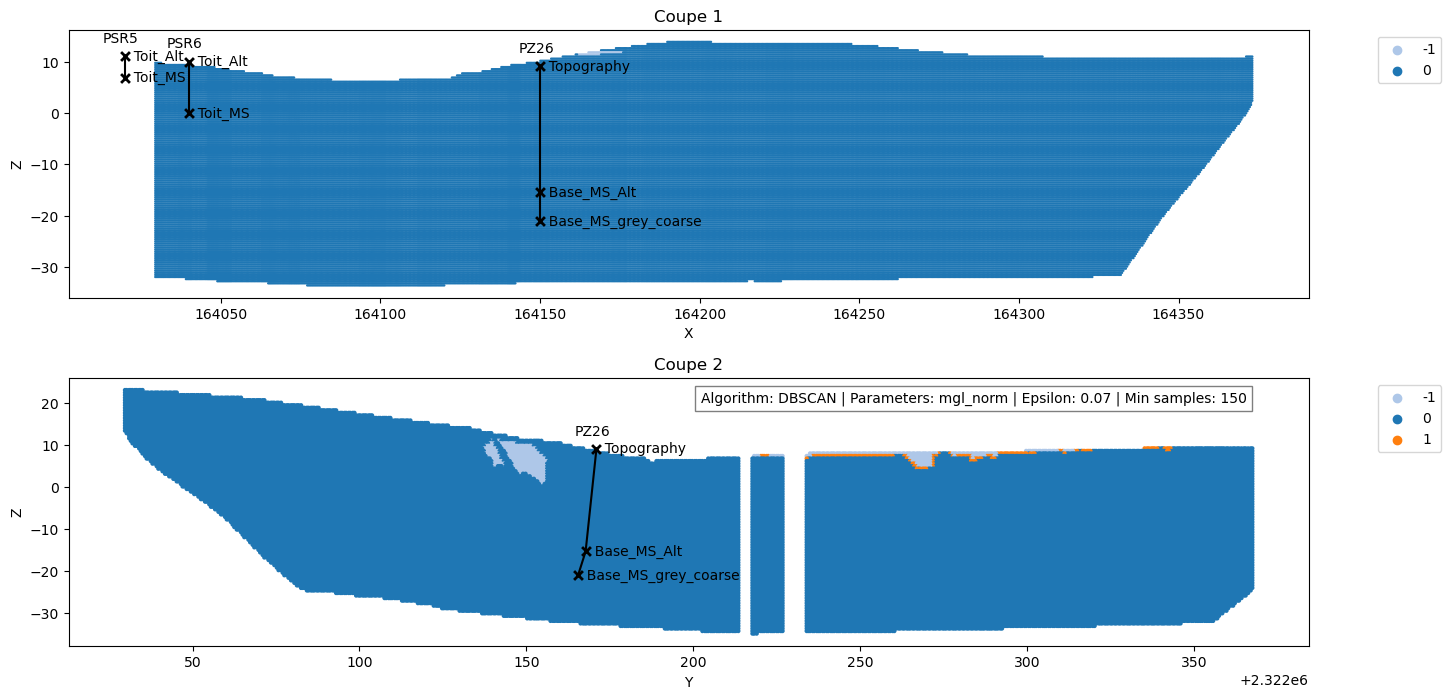

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

unique_labels = coupes['label'].unique()
# Create a color map dictionary
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Use the color map to assign colors based on label
colors = coupes['label'].map(color_map)


# test = slice2[slice2['label'].isin([0, -1])]
#coupe 1
sns.scatterplot(data=slice1, x= 'X' , y= 'Z', hue=slice1['label'], s=3,ax=axes[0],palette=color_map,linewidth = 0)
axes[0].set_title("Coupe 1")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
axes[0].legend(title='Légende')
sns.scatterplot(data=wells, x='X', y='Z',marker='x',s=2,linewidth = 9,ax=axes[0],c='k')
axes[0].plot(PZ26['X'], PZ26['Z'], '-',color='black')
axes[0].plot(PSR6_well['X'], PSR6_well['Z'], '-',color='black')
axes[0].plot(PSR5_well['X'], PSR5_well['Z'], '-',color='black')
for index, row in wells.iterrows():
    axes[0].annotate("  "+row['Soil_type'], (row['X'], row['Z']), ha='left', va='center')
axes[0].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR5",tuple(PSR5_well.loc[PSR5_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')
axes[0].annotate("PSR6",tuple(PSR6_well.loc[PSR6_well['Z'].idxmax()][['X', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')



#coupe 2
sns.scatterplot(data=slice2, x='Y' , y='Z',hue=slice2['label'], s=10,ax=axes[1],palette=color_map,linewidth = 0)
axes[1].set_title("Coupe 2")
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
axes[1].legend(title='Légende')
sns.scatterplot(data=PZ26, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1],c='k')
axes[1].plot(PZ26['Y'], PZ26['Z'], '-',color='black')
for index, row in PZ26.iterrows():
    axes[1].annotate("  "+row['Soil_type'], (row['Y'], row['Z']), ha='left', va='center')
axes[1].annotate("PZ26",tuple(PZ26.loc[PZ26['Z'].idxmax()][['Y', 'Z']]),textcoords="offset points", xytext=(10,10), ha='right')

# points = well[['Soil type','X', 'Z']]
# sns.scatterplot(data=z, x='Y', y='Z',marker='x',s=2,linewidth = 9,ax=axes[1], hue='Soil type')


if algo == 'DBSCAN':
    clustering_params = f"Algorithm: {algo} | Parameters: {str(dataset_DB)} | Epsilon: {eps} | Min samples: {min_sample}"
elif algo == 'HDBSCAN':
    if hdbscan_model.cluster_selection_epsilon == 0:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}"
    else:
        clustering_params = f"Algorithm: {algo} | Parameters: {dataset_HDB} | Min samples: {min_samples} | min_clust_size: {min_cluster_size}\nCluster_selection_epsilon: {hdbscan_model.cluster_selection_epsilon}"
fig.text(0.95, 0.95, clustering_params, ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))



# Move the legend outside the plots
legend = axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend = axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()